# **Modeling the mind of a predator: Interactive cognitive maps support flexible avoidance of dynamic threats**

### Toby Wise, Caroline J Charpentier, Peter Dayan & Dean Mobbs

## Analysis notebook 2 - Modelling of action prediction

This notebook contains code for computational models of action prediction data.

In [2]:
import pandas as pd
import seaborn as sns
import os
import pingouin as pg
import matplotlib.pyplot as plt
from maMDP.env_io import *
from maMDP.env_io import hex_environment_from_dict
import sys
sys.path.append("../../code") 
from action_prediction_model_fit import *
from scipy.stats import ttest_rel
import matplotlib.font_manager
import matplotlib
matplotlib.style.use('toby')
matplotlib.rcParams['font.weight'] = 'normal'
pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams["font.family"] = "Heebo"

C:\Users\tobyw\Miniconda3\envs\mne\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\tobyw\Miniconda3\envs\mne\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.5, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Load in data

In [4]:
rating_dfs = []
rt_dfs = []
confidence_dfs = []
prediction_dfs = []
response_dfs = []

output_dir = '../../data/'
experiment = 'experiment-1'

data_dfs = {'rating_data': rating_dfs, 'rt_data': rt_dfs, 'confidence_data': confidence_dfs, 'prediction_data': prediction_dfs, 'response_data': response_dfs}

for data_type, df_list in data_dfs.items():
    
    data_type_dir = os.path.join(output_dir, data_type, experiment)
    
    conditions = os.listdir(data_type_dir)
    
    for c in conditions:
        for i in os.listdir(os.path.join(data_type_dir, c)):
            if '.csv' in i:
                df = pd.read_csv(os.path.join(data_type_dir, c, i))
                df_list.append(df)

rating_df = pd.concat(rating_dfs)
rt_df = pd.concat(rt_dfs)
confidence_df = pd.concat(confidence_dfs)
prediction_df = pd.concat(prediction_dfs)
response_df = pd.concat(response_dfs)

In [5]:
prediction_df = prediction_df.sort_values(['subjectID', 'exp', 'condition', 'env', 'trial', 'response_number']).reset_index(drop=True)
response_df = response_df.sort_values(['agent', 'subjectID', 'exp', 'condition', 'env', 'trial', 'response_number']).reset_index(drop=True)

## Load environment data

In [6]:
envs = {}
for cond in ['A', 'B', 'C']:
    with open('../../data/game_info/experiment-1/condition_{0}.json'.format(cond), 'r') as f:
        game_info = json.load(f)
    envs[cond] = [hex_environment_from_dict(env, ['Dirt', 'Trees', 'Reward']) for env in game_info['environments']]

### Plot the environments

Not a necessary part of the analysis, but useful to see what the environments actually looked like!

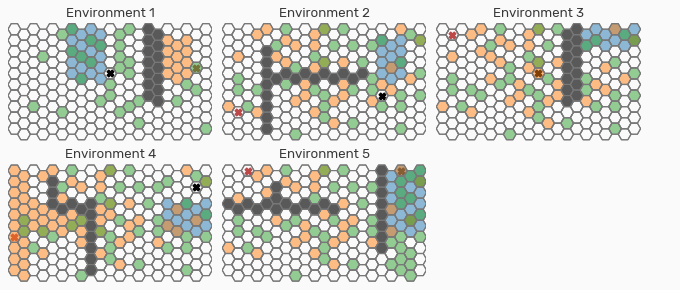

In [7]:
n_envs = len(envs['A'])

f, ax = plt.subplots(2, 3, figsize=(10, 4))

for env in range(n_envs):
    
    envs['A'][env].plot(ax=ax[int(env / 3), env % 3], agent_plotting_kwargs={'s': 40}, agent_colours={'Predator_1': '#bd4848'})
    ax[int(env / 3), env % 3].set_title('Environment {0}'.format(env + 1))

plt.subplots_adjust(wspace=-0.2)
ax[1, 1].set_axis_off()
ax[1, 2].set_axis_off()
# plt.savefig('../../figures/pilot/Figure-4_Exp2_environments.svg')

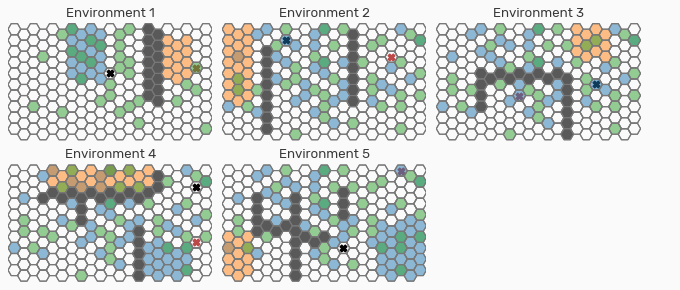

In [8]:
n_envs = len(envs['B'])

f, ax = plt.subplots(2, 3, figsize=(10, 4))

for env in range(n_envs):
    
    envs['B'][env].plot(ax=ax[int(env / 3), env % 3], agent_plotting_kwargs={'s': 40}, agent_colours={'Predator_1': '#bd4848'})
    ax[int(env / 3), env % 3].set_title('Environment {0}'.format(env + 1))

plt.subplots_adjust(wspace=-0.2)
ax[1, 1].set_axis_off()
ax[1, 2].set_axis_off()

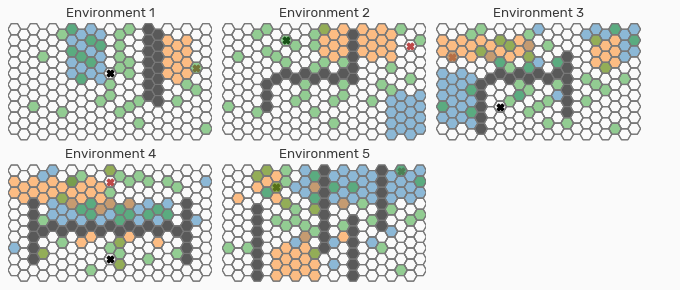

In [9]:
n_envs = len(envs['C'])

f, ax = plt.subplots(2, 3, figsize=(10, 4))

for env in range(n_envs):
    
    envs['C'][env].plot(ax=ax[int(env / 3), env % 3], agent_plotting_kwargs={'s': 40}, agent_colours={'Predator_1': '#bd4848'})
    ax[int(env / 3), env % 3].set_title('Environment {0}'.format(env + 1))

plt.subplots_adjust(wspace=-0.2)
ax[1, 1].set_axis_off()
ax[1, 2].set_axis_off()

### Get predator/prey data

In [10]:
predator_df = response_df[response_df['agent'] == 'predator']
prey_df = response_df[response_df['agent'] == 'prey']
prediction_df.loc[predator_df['cellID'] == -999, 'cellID'] = -999 # Trials where predator caught prey half way through 

## Fit models

Model fitting is performed using the `fit_prediction_models` function in the `action_prediction_model_fit.py` script. As the models have already been fit, the fitting itself is commented out here and the results are loaded in.

In [12]:
# fit, _ = fit_prediction_models(predator_df, prey_df, prediction_df, envs, n_jobs=1)

# fit['model'] = fit['model'].str.replace('_', '\n').str.capitalize()

# Save results
# fit.to_csv('../../data/prediction_model_fit_results.csv', index=None)

# Load in results
fit = pd.read_csv('../../data/prediction_model_fit_results.csv')

# Americanise for figures
fit = fit.replace(regex={'isation': 'ization'})

### Get best fitting models

In [13]:
subject_fit = fit.groupby(['subjectID', 'model']).sum().reset_index()

BIC_mean = subject_fit.groupby(['model']).mean().reset_index()

### Best fitting model

In [14]:
BIC_mean[BIC_mean['BIC'] == BIC_mean['BIC'].min()]

,model,accuracy,log_lik,BIC,alpha_values,decay_values,w_values
0,Combined\ngeneralization,0.564835,-83.12618,175.009383,0.534687,0.34318,0.128801


Compare the goal inference model to the policy learning only model

In [16]:
nsubs = len(subject_fit.loc[subject_fit['model'] == 'Policy\nlearning', 'BIC'])
t, p = ttest_rel(subject_fit.loc[subject_fit['model'] == 'Goal\ninference', 'BIC'], subject_fit.loc[subject_fit['model'] == 'Policy\nlearning', 'BIC'])
print('t({0})={1}, p={2}, d={3}'.format(nsubs-1, t, p, pg.compute_effsize_from_t(t, N=nsubs, eftype='cohen')))

t(149)=-22.249465871003423, p=3.2309276086111822e-49, d=-3.633322562228485


### Plot accuracy

C:\Users\tobyw\Miniconda3\envs\mne\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tobyw\Miniconda3\envs\mne\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


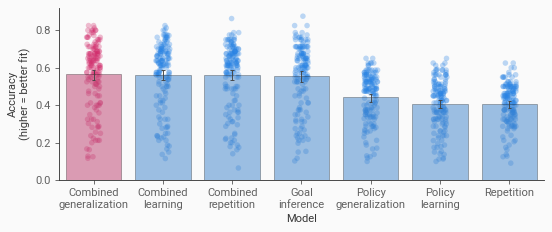

In [18]:
pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
colours = np.array([pal[0]] * len(BIC_mean))
colours[np.argmax(BIC_mean['accuracy'])] = pal[1]

f, ax = plt.subplots(1, 1, figsize=(7, 3))
sns.stripplot('model', 'accuracy', data=subject_fit, dodge=True, alpha=0.3, ax=ax, palette=colours, zorder=-1)
sns.barplot('model', 'accuracy', data=subject_fit, alpha=0.5, capsize=.05, errwidth=0.8, ax=ax, palette=colours, linewidth=.5, edgecolor='black')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy\n(higher = better fit)')

max_bic = subject_fit['accuracy'].max()
min_bic = subject_fit['accuracy'].min()

sns.despine()
plt.tight_layout()
plt.savefig('../../figures/Figure-3_model_fit_accuracy.svg')

### Plot BIC

C:\Users\tobyw\Miniconda3\envs\mne\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tobyw\Miniconda3\envs\mne\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


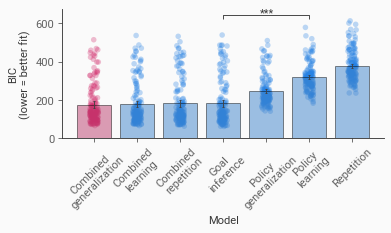

In [22]:
pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
colours = np.array([pal[0]] * len(BIC_mean))
colours[np.argmin(BIC_mean['BIC'])] = pal[1]

f, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.stripplot('model', 'BIC', data=subject_fit, dodge=True, alpha=0.3, ax=ax, palette=colours, zorder=-1)
sns.barplot('model', 'BIC', data=subject_fit, alpha=0.5, capsize=.05, errwidth=0.8, ax=ax, palette=colours, linewidth=.8, edgecolor='black')
plt.xticks(rotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('BIC\n(lower = better fit)')

max_bic = subject_fit['BIC'].max()
min_bic = subject_fit['BIC'].min()

# ax.set_ylim(min_bic - max_bic / 20, max_bic + max_bic / 5)

y_offset = -30

ax.plot([3, 3, 5, 5], [max_bic+y_offset+40, max_bic+y_offset+60, max_bic+y_offset+60, max_bic+y_offset+40], color='#1c1c1c', linewidth=.7)
ax.text(3.85, max_bic+y_offset+60, '***')

sns.despine()
plt.tight_layout()
plt.savefig('../../figures/Figure-3_model_fit.svg')

### Get the best fitting model for each subject

In [114]:
subject_best_models = {
    'subjectID': [],
    'best_model': []
}

for sub in subject_fit['subjectID'].unique():
    sub_df = subject_fit[subject_fit['subjectID'] == sub]
    subject_best_models['subjectID'].append(sub)
    subject_best_models['best_model'].append(sub_df.iloc[sub_df['BIC'].argmin()].model)
    
subject_best_models = pd.DataFrame(subject_best_models).sort_values('best_model')

### Plot each subject's best fitting model

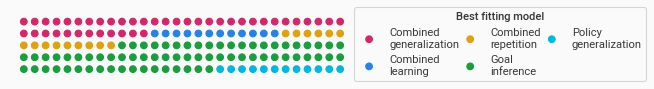

In [300]:
best_model_colours = {}
best_model_counts = {}

for m in subject_best_models['best_model']:
    if not m in best_model_colours:
        best_model_colours[m] = []
        best_model_counts[m] = 0
    if m == 'Combined\ngeneralization':
        best_model_colours[m].append(pal[1])
    if m == 'Combined\nlearning':
        best_model_colours[m].append(pal[0])
    if m == 'Combined\nrepetition':
        best_model_colours[m].append(pal[2])
    if m == 'Goal\ninference':
        best_model_colours[m].append('#1a9c3f')
    if m == 'Policy\ngeneralization':
        best_model_colours[m].append('#00b7e0')
    best_model_counts[m] += 1

plt.figure(figsize=(5, 1.1))  

x = np.tile(np.arange(len(subject_best_models) / 5), 5)
y = np.repeat(np.arange(5), int(len(subject_best_models) / 5))

last_count = 0

for m in best_model_colours.keys():
    plt.scatter(x[last_count:last_count + best_model_counts[m]], -y[last_count:last_count + best_model_counts[m]], color=best_model_colours[m], label=m)
    last_count += best_model_counts[m]

legend = plt.legend(ncol=3, title='Best fitting model', loc='center right', bbox_to_anchor=(1.85, .52), columnspacing=0)
legend.get_title().set_fontweight('medium')
plt.ylim(-5, 1)
plt.axis('off')
plt.savefig('../../figures/Figure-3_subject_best_model.svg')

### Select the best fitting model and tidy parameters

In [96]:
best_model = BIC_mean[BIC_mean['BIC'] == BIC_mean['BIC'].min()]['model'].values[0]
best_model_params = fit.groupby(['subjectID', 'model']).mean().reset_index()
best_model_params = best_model_params[best_model_params['model'] == best_model]
best_model_params['w_values'] = 1 - best_model_params['w_values']  # higher = more MB is more intuitive
best_model_params_long = best_model_params.melt('subjectID', ['alpha_values', 'decay_values', 'w_values'])

### Plot parameters from the best fitting model

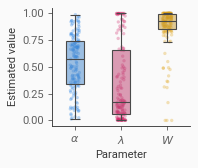

In [98]:
plt.figure(figsize=(2.5, 2.2))

best_model_params_long

sns.stripplot(x='variable', y='value', data=best_model_params_long, alpha=0.3, zorder=-1, size=3)
ax = sns.boxplot(x='variable', y='value', data=best_model_params_long, width=0.4, fliersize=0, zorder=100)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

ax.set_xticklabels([r'$\alpha$', r'$\lambda$', '$W$'])

ax.set_xlabel('Parameter')
ax.set_ylabel('Estimated value')
sns.despine()

plt.tight_layout()

plt.savefig('../../figures/Figure-3_param_values.svg')

### Check that the weighting parmaeter differs significantly from zero (i.e., show that subjects are not entirely model-free)

In [51]:
from scipy.stats import ttest_1samp
t, p = ttest_1samp(1 - best_model_params['w_values'], 0)
print('t({0})={1}, p={2}, d={3}'.format(nsubs-1, t, p, pg.compute_effsize_from_t(t, N=nsubs, eftype='cohen')))

t(149)=53.21441405872948, p=7.770815064062053e-99, d=8.689877427004987
